In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2

# Getting image Path

In [3]:
# initializing path
data_dir = Path('dataset')
train_dir = data_dir

In [4]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / '1_normal'
Cataract_Cases_dir = train_dir / '2_cataract'
Glaucoma_Cases_dir = train_dir / '3_glaucoma'
Retina_Cases_dir = train_dir / '4_retina_disease'

In [5]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.png')
Cataract_Cases = Cataract_Cases_dir.glob('*.png')
Glaucoma_Cases = Glaucoma_Cases_dir.glob('*.png')
Retina_Cases = Retina_Cases_dir.glob('*.png')

In [6]:
# An empty list for inserting data into this list in (image_path, Label) format
train_data = []

In [7]:
# Labeling the Cyst case as 0
for img in Cataract_Cases:
    train_data.append((img, 0))

# Labeling the Normal case as 1
for img in Normal_Cases:
    train_data.append((img, 1))

# Labeling the Stone case as 2
for img in Glaucoma_Cases:
    train_data.append((img, 2))

# Labeling the Tumor case as 3
for img in Retina_Cases:
    train_data.append((img, 3))

In [8]:
# Making a data frame using pandas (creating CSV file)
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

In [9]:
# Select random data row from the dataframe and show and index it.
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head(10)

image  label
0              dataset\1_normal\NL_050.png      1
1              dataset\1_normal\NL_123.png      1
2  dataset\4_retina_disease\Retina_091.png      3
3              dataset\1_normal\NL_140.png      1
4      dataset\3_glaucoma\Glaucoma_094.png      2
5              dataset\1_normal\NL_282.png      1
6      dataset\3_glaucoma\Glaucoma_033.png      2
7              dataset\1_normal\NL_022.png      1
8              dataset\1_normal\NL_017.png      1
9      dataset\2_cataract\cataract_012.png      0

In [10]:
# Returns all the unique values of Label in train_data
train_data['label'].unique()

array([1, 3, 2, 0], dtype=int64)

In [11]:
# Returns number of rows and columns
train_data.shape

(601, 2)

# Available Dataset (Plotting Graph)

In [12]:
# Getting the count of each class (Normal, Cyst, Tumor, Stone)
cases_count = train_data['label'].value_counts()
cases_count

1    300
2    101
3    100
0    100
Name: label, dtype: int64

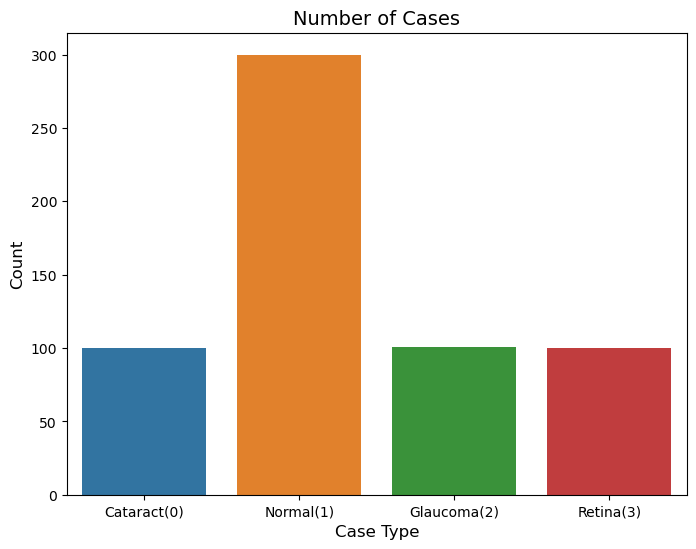

In [13]:
# Plotting the Graph 
plt.figure(figsize = (8,6))  # Size of graph
sns.barplot(x = cases_count.index, y = cases_count.values)
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count.index)),['Cataract(0)', 'Normal(1)','Glaucoma(2)','Retina(3)'])
plt.show()

# CT Scanned Images Available 

In [14]:
# Getting few samples for both the classes

# Gets 5 data from each cases
Cataract_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Glaucoma_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Retina_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()

# Combining data in one variable
samples = Cataract_Samples + Normal_Samples + Glaucoma_Samples + Retina_Samples

del Cataract_Samples, Normal_Samples, Glaucoma_Samples, Retina_Samples



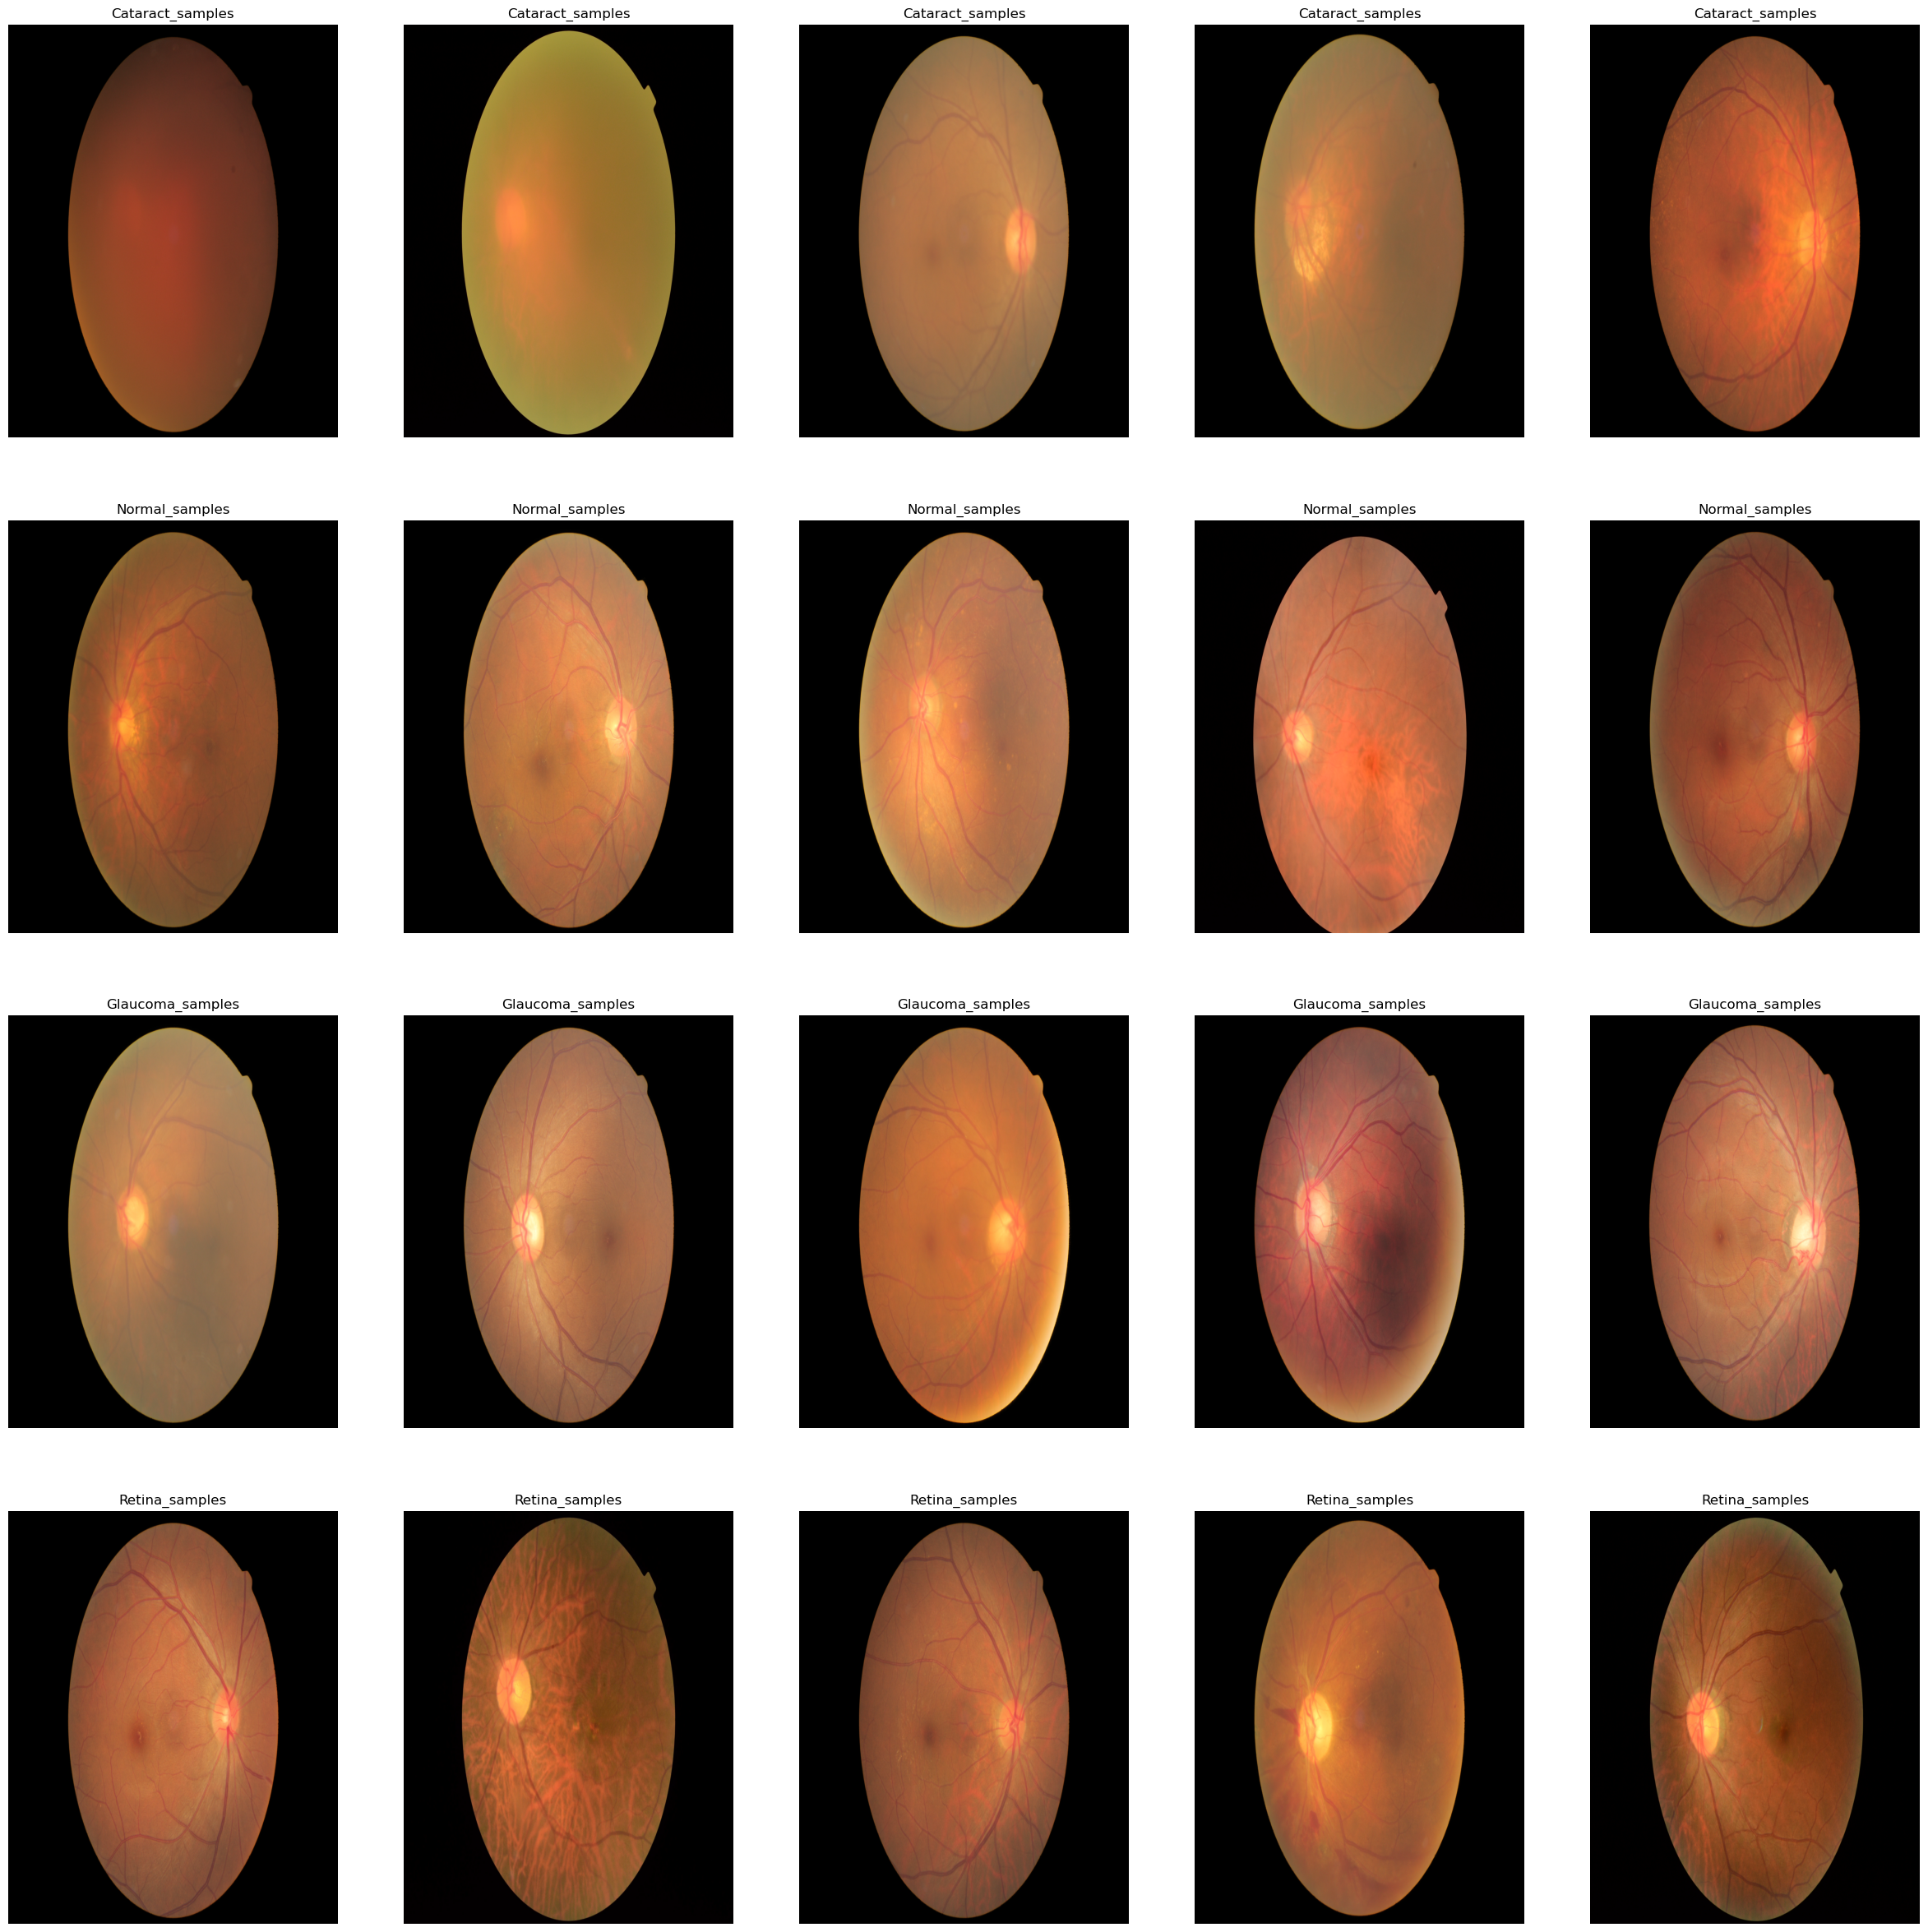

In [15]:
# Displaying the picture
f, ax = plt.subplots(4, 5,figsize=(30,30)) # Initilizing the graph where image is to be display

for i in range(20):
    img = imread(samples[i]) # reading the image
    ax[i//5, i%5].imshow(img, cmap='gray') # displaying the image
    
    # putting title in the images
    if i<5:
        ax[i//5, i%5].set_title("Cataract_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Glaucoma_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Retina_samples")
    
    # removing the scales in the graph
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

plt.show()
    

In [16]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / '1_normal'
Cataract_Cases_dir = train_dir / '2_cataract'
Glaucoma_Cases_dir = train_dir / '3_glaucoma'
Retina_Cases_dir = train_dir / '4_retina_disease'

In [17]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.png')
Cataract_Cases = Cataract_Cases_dir.glob('*.png')
Glaucoma_Cases = Glaucoma_Cases_dir.glob('*.png')
Retina_Cases = Retina_Cases_dir.glob('*.png')
train_data = []
train_labels = []

# Data Pre Processing

In [18]:

for img in Cataract_Cases:
    img = cv2.imread(str(img)) # Loading image
    img = cv2.resize(img, (28,28)) # resizing image 
    if img.shape[2] == 1: # Number of channel in the dimension.
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Changing image color
    img = np.array(img) # creating a numpy array
    img = img/255  # Normalization
    label = 'Cataract' 
    train_data.append(img)
    train_labels.append(label)

In [19]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img,(28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [20]:
for img in Glaucoma_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Glaucoma"
    train_data.append(img)
    train_labels.append(label)

In [21]:
for img in Retina_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Retina"
    train_data.append(img)
    train_labels.append(label)

In [22]:
train_data1 = np.array(train_data) # train_data or train_data1 is a 4D array from 3D image Array
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (601, 28, 28, 3)
Total number of Labels :  (601,)


In [23]:
train_data1[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [24]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

label
0    Cataract
1    Cataract
2    Cataract
3    Cataract
4    Cataract
..        ...
596    Retina
597    Retina
598    Retina
599    Retina
600    Retina

[601 rows x 1 columns]

In [25]:
train_labels1['label'].unique()

array(['Cataract', 'Normal', 'Glaucoma', 'Retina'], dtype=object)

In [26]:
train_labels1['label'] = train_labels1['label'].map({'Cataract':0,'Normal':1,'Glaucoma':2,'Retina':3})

In [27]:
train_labels1

label
0        0
1        0
2        0
3        0
4        0
..     ...
596      3
597      3
598      3
599      3
600      3

[601 rows x 1 columns]

In [28]:
print(train_data1.shape)
print(train_labels1.shape)

(601, 28, 28, 3)
(601, 1)


In [29]:
train_labels1.isnull().sum() # Checking for the missing(NULL) value in the labels1

label    0
dtype: int64

# Solving Image Dataset Imblance Using SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() # Initilizing The SMOTE class
train_rows = len(train_data1) # getting total number or rows
train_data1 = train_data1.reshape(train_rows,-1)  # Converting 4D array to 2D Array
train_data2, train_labels2 = smote.fit_resample(train_data1,train_labels1) # Balancing Image Dataset using SMOTE

# Balanced Dataset after using SMOTE

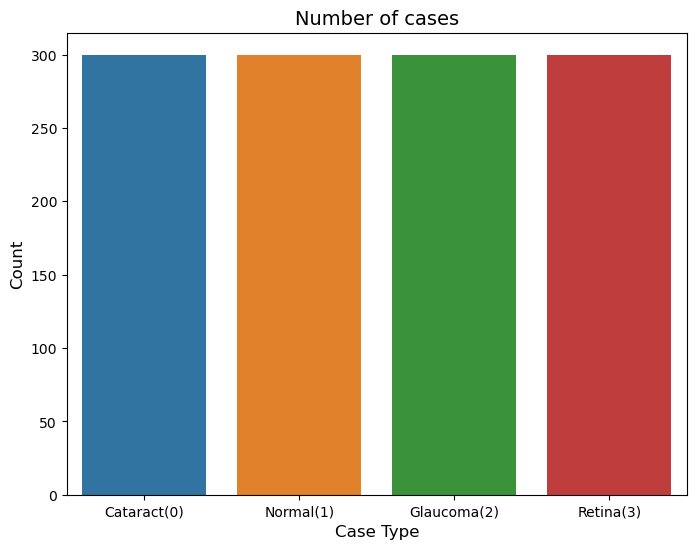

In [31]:
cases_count1 = train_labels2['label'].value_counts() # Counting values of diffrent image

#Plotting Graph for Label values
plt.figure(figsize=(8,6)) # Setting size of graph
sns.barplot(x=cases_count1.index, y=cases_count1.values)
plt.title('Number of cases', fontsize = 14)
plt.xlabel('Case Type',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count1.index)), ['Cataract(0)', 'Normal(1)', 'Glaucoma(2)', 'Retina(3)'])
plt.show()

In [32]:
train_data2.shape

(1200, 2352)

In [33]:
train_data2 = train_data2.reshape(-1,28,28,3) # Converting 2D array to 4D Array
train_data2.shape


(1200, 28, 28, 3)

In [34]:
train_data

[array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.00392157, 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.00392157, 0.00392157],
         [0.        , 0.        , 0.     

# Splitting the Dataset For training and testing and Validating using sklearn : train_test_split

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size = 0.20,random_state = 42) # With random_state=42, we get the same train and test sets across different executions
X_train, X_val, y_train, y_val = train_test_split(train_data2, train_labels2, test_size = 0.10,random_state = 42)

In [65]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (1080, 28, 28, 3)
Testing Data X :  (240, 28, 28, 3)
Training Data y :  (1080, 1)
Testing Data y :  (240, 1)
Validating Data X :  (120, 28, 28, 3)
Validating Data y (120, 1)
Image Size :  (28, 28, 3)


# Data Augmentation 
It is a process in which we can transform 1 data into many forms for the better alaysing of the data by the Model to get more detail view of image so it can predict the output.
Basically data augmentation is perform to increase the robustness of the Machine learning Model.

https://www.youtube.com/watch?v=hxLU32zhze0

In [66]:
import tensorflow as tf
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=30, 
                    horizontal_flip=True)

# #CNN

In [62]:
# Making Model

from tensorflow.keras import layers,models

model = models.Sequential([
        layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten()

])
model.add(layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                

Epoch 1/100
34/34 [==============================] - 1s 18ms/step - loss: 1.3874 - accuracy: 0.2852 - val_loss: 1.3716 - val_accuracy: 0.3083
Epoch 2/100
34/34 [==============================] - 0s 14ms/step - loss: 1.3405 - accuracy: 0.3796 - val_loss: 1.3560 - val_accuracy: 0.3333
Epoch 3/100
34/34 [==============================] - 1s 19ms/step - loss: 1.2875 - accuracy: 0.3981 - val_loss: 1.2617 - val_accuracy: 0.4833
Epoch 4/100
34/34 [==============================] - 1s 20ms/step - loss: 1.2194 - accuracy: 0.4380 - val_loss: 1.2451 - val_accuracy: 0.3667
Epoch 5/100
34/34 [==============================] - 1s 20ms/step - loss: 1.1800 - accuracy: 0.4935 - val_loss: 1.1917 - val_accuracy: 0.4333
Epoch 6/100
34/34 [==============================] - 1s 21ms/step - loss: 1.1600 - accuracy: 0.4824 - val_loss: 1.1509 - val_accuracy: 0.5583
Epoch 7/100
34/34 [==============================] - 1s 21ms/step - loss: 1.0950 - accuracy: 0.5269 - val_loss: 1.1274 - val_accuracy: 0.4917
Epoch 

34/34 [==============================] - 1s 19ms/step - loss: 0.3819 - accuracy: 0.8750 - val_loss: 0.7499 - val_accuracy: 0.7000
Epoch 59/100
34/34 [==============================] - 1s 22ms/step - loss: 0.3685 - accuracy: 0.8759 - val_loss: 0.7268 - val_accuracy: 0.7083
Epoch 60/100
34/34 [==============================] - 1s 22ms/step - loss: 0.3756 - accuracy: 0.8806 - val_loss: 0.6645 - val_accuracy: 0.7583
Epoch 61/100
34/34 [==============================] - 1s 16ms/step - loss: 0.3604 - accuracy: 0.8870 - val_loss: 0.6552 - val_accuracy: 0.7333
Epoch 62/100
34/34 [==============================] - 1s 15ms/step - loss: 0.3553 - accuracy: 0.8907 - val_loss: 0.6736 - val_accuracy: 0.7250
Epoch 63/100
34/34 [==============================] - 1s 15ms/step - loss: 0.3336 - accuracy: 0.8870 - val_loss: 0.6727 - val_accuracy: 0.7167
Epoch 64/100
34/34 [==============================] - 1s 16ms/step - loss: 0.3306 - accuracy: 0.8815 - val_loss: 0.6863 - val_accuracy: 0.7250
Epoch 65/100

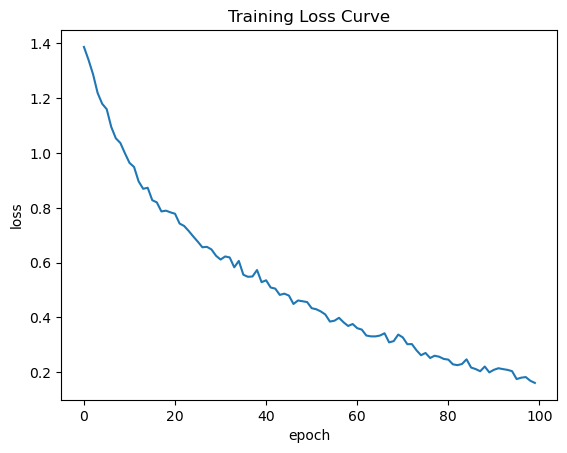

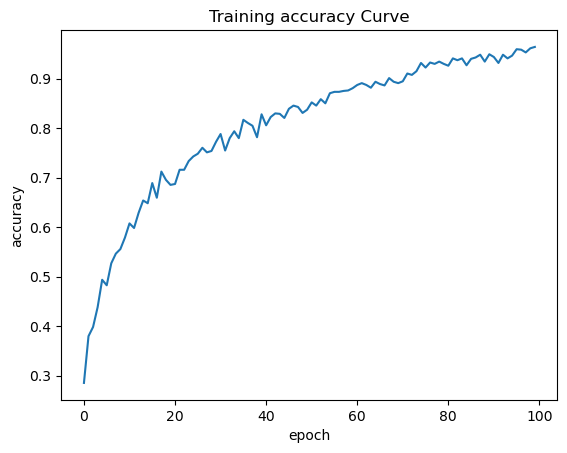

In [63]:
# Traning Model

#Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Fit
history = model.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_val), np.array(y_val)))

# Graph for Loss 
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

# Graph for Accuracy 
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

In [40]:
#Predicting Values

a = model.predict(X_test)
print(a)

8/8 [==============================] - 0s 6ms/step
[[8.92382767e-03 1.66268200e-02 1.47262332e-03 9.72976685e-01]
 [6.07861011e-06 2.34883605e-03 9.96487141e-01 1.15799916e-03]
 [1.91163144e-06 5.56777775e-01 3.47371888e-03 4.39746678e-01]
 [8.95883772e-04 1.92226209e-02 9.76042867e-01 3.83866602e-03]
 [9.99667764e-01 1.47181794e-07 3.32136231e-04 2.62119411e-08]
 [7.93166831e-02 3.62603068e-02 5.65510476e-04 8.83857548e-01]
 [1.02576219e-01 5.71704984e-01 1.91915571e-03 3.23799610e-01]
 [5.27503926e-06 9.74564627e-02 9.01702821e-01 8.35434825e-04]
 [5.63940375e-05 8.66702855e-01 1.19876683e-01 1.33641232e-02]
 [1.40710438e-06 5.34084514e-02 9.41128850e-01 5.46129048e-03]
 [1.08863373e-04 2.69948579e-02 9.40340579e-01 3.25557105e-02]
 [1.63537815e-01 2.15615973e-01 4.22879577e-01 1.97966561e-01]
 [2.28362650e-01 2.84983873e-01 6.76772266e-04 4.85976636e-01]
 [1.11790051e-07 1.41839981e-01 8.25053930e-01 3.31059583e-02]
 [2.32502589e-05 2.63672352e-01 1.84540063e-01 5.51764369e-01]
 [1.

In [41]:
# Sparse to Dense
b = []
for i in a:
    if i[0] > i[1] and i[0] > i[2] and i[0] > i[3]:
        b.append(0)
    elif i[1] > i[0] and i[1] > i[2] and i[1] > i[3]:
        b.append(1)
    elif i[2] > i[1] and i[2] > i[0] and i[2] > i[3]:
        b.append(2)
    else:
        b.append(3)

print(b)

[3, 2, 1, 2, 0, 3, 1, 2, 1, 2, 2, 2, 3, 2, 3, 3, 3, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 3, 0, 3, 2, 2, 0, 0, 3, 0, 2, 0, 3, 0, 3, 1, 3, 1, 2, 0, 1, 0, 0, 1, 0, 3, 3, 1, 3, 2, 2, 3, 3, 1, 2, 1, 2, 0, 1, 2, 1, 2, 3, 2, 2, 1, 3, 0, 0, 1, 1, 0, 2, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 0, 3, 1, 1, 1, 3, 0, 3, 2, 0, 1, 1, 1, 0, 0, 2, 0, 3, 2, 3, 2, 3, 2, 2, 2, 0, 3, 1, 3, 0, 2, 3, 2, 3, 3, 2, 3, 1, 1, 0, 0, 1, 3, 1, 1, 3, 0, 0, 2, 2, 2, 3, 0, 1, 0, 0, 3, 0, 0, 3, 2, 3, 2, 0, 1, 2, 2, 1, 1, 3, 1, 3, 2, 3, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 3, 1, 3, 0, 0, 0, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 3, 3, 0, 2, 2, 2, 1, 0, 1, 0, 3, 3, 2, 3, 2, 1, 3, 0, 0, 1, 0, 1, 1, 3, 0, 2, 1, 2, 3, 3, 2]


In [42]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test,b))
cm = confusion_matrix(y_test, b)
print("\n\nConfusion Matrix : \n\n",cm)

Accuracy Score :  0.8833333333333333


Confusion Matrix : 

 [[52  2  1  1]
 [ 3 51  7  8]
 [ 0  3 60  0]
 [ 1  2  0 49]]


[Text(0, 0.5, 'Cataract'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Glaucoma'),
 Text(0, 3.5, 'Retina')]

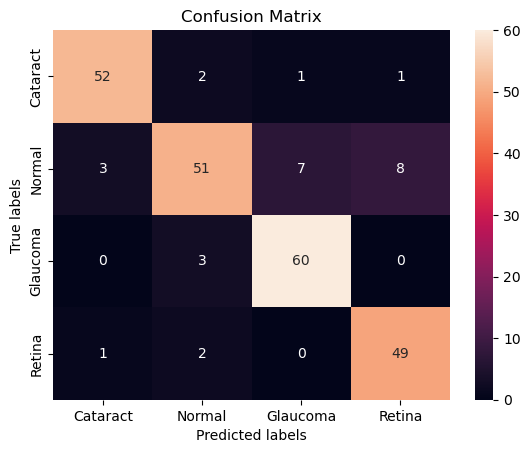

In [43]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Cataract', 'Normal','Glaucoma','Retina']) 
ax.yaxis.set_ticklabels(['Cataract', 'Normal','Glaucoma','Retina'])

In [44]:
print("F1 Score is :",f1_score(y_test,b,average='micro'))


F1 Score is : 0.8833333333333333


In [68]:
from tensorflow.keras import layers,models

model = models.Sequential([
        layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
    
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
    
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),

        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
    
        layers.Flatten()

])
model.add(layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                

In [ ]:
#For manual Testing

In [ ]:
pic = []
image='dataset/3_glaucoma/Glaucoma_014.png'
img = cv2.imread(str(image))

In [ ]:
img = cv2.resize(img, (28,28))
pic.append(img)
pic1 = np.array(pic)

In [ ]:
a = model.predict(pic1)

In [ ]:
if a.argmax() == 0 :
    print("The detected disease is \"Cataract\"")
elif a.argmax() == 1 :
    print("Kidney is \"Normal\" ")
elif a.argmax() == 2:
    print("The detected disease is \"Glaucoma\"")
else:
    print(f"The detected disease is \"Retina\" {a.argmax()}")